## Assignment 9B
The volume of a ball of radius $R$ in $d$ dimensions is given by:
$$V_d(R)=\dfrac{R^d}{d}\dfrac{2\pi^\tfrac{d}{2}}{\Gamma(\tfrac{d}{2})}=\dfrac{\pi^\tfrac{d}{2}R^d}{\Gamma(\tfrac{d}{2}+1)}$$
In this subsection, we discuss this result in relation to the so-called “curse of dimensionality” in machine learning, particularly in the context of regression.

Consider a hypercube of side length $2R$ centered at the origin. The ratio of the volume of the inscribed sphere to the hypercube is:
$$\text{Ratio}(d)=\dfrac{V_d(R)}{(2R)^d}=\dfrac{2^{-d}\pi^\tfrac{d}{2}}{\Gamma(\tfrac{d}{2}+1)}$$
For example, we have:
- For $d=1$: $\text{Ratio}(1)=1$
- For $d=1$: $\text{Ratio}(2)=\tfrac{\pi}{4}\approx0.785$
- For $d=1$: $\text{Ratio}(3)=\tfrac{\pi}{6}\approx0.524$

Figure 1 shows how this ratio decreases rapidly as the dimension $d$ increases, as well as the estimated ratio based on the Stirling formula. This rapid decrease illustrates a fundamental feature of high-dimensional spaces: *as dimensionality increases, an increasingly small fraction of the hypercube’s volume is occupied by the inscribed hypersphere.*

In the context of regression, this implies that most points in the space are actually far from any given set of training data. Imagine we have a dataset of function values at certain points in a $d$-dimensional space, and we aim to predict the value of the function outside this training dataset. Our ability to make predictions is presumably higher closer to the training points. However, the volume ratio shown above reveals that as dimensionality increases, an increasingly large portion of the space is far from any given set of data points. This geometric insight gives us a clue as to why regression is harder in high-dimensional problems:

1. A regular mesh in d dimensions contains $[L/(2R)]^d$ points, where $L$ is the side length of the domain. This represents an exponential growth in the number of points needed to maintain a given mesh density as $d$ increases.

2. Even with this large amount of data, most of the space is at a distance greater than $R$ from the training points, where our predictive ability is limited.

These factors combine to make function approximation in high-dimensional spaces a challenging task. The only way to overcome the curse of dimensionality, introduced above, is to imbue “prior knowledge” about the function that we aim to learn within our regression model, using appropriate machine-learning techniques.

### Problem 1 (30 points)
Monte Carlo Estimation in Low Dimensions.
Use the mean-value method, as explained in Lecture 8, to estimate the volume of a unit hypersphere for dimensions $d = 2$ and $d = 10$. The volume can be expressed as the integral:
$$V_d=\int_{[-1,1]^d}f(\vec{x})\ d^dx$$
where $f(\vec{x})=1$ inside the hypersphere $\left(\sum_{i=1}^dx_i^2\le 1\right)$ and $0$ otherwise.

- Compute the volume using the Monte Carlo mean-value estimate: $$V_d\approx V_\text{cube}\braket{f},\text{ where } V_\text{cube}=2^d$$ using $N=100$ sampling, $N=10^6$ sampling, and a few intermediate values.

- Compute the statistical uncertainty and compare your results with the exact formula. Discuss the accuracy of your estimate.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
# np.random.seed(0)  # For reproducibility


# Exact Volume Ratio of N-Dimensional Unit Ball
def exact_proportion(dimension: int) -> float:
    return 2 ** (-dimension) * exact_volume(dimension)

# Exact Volume of N-Dimensional Unit Ball
def exact_volume(dimension: int) -> float:
    return np.pi**(dimension / 2) / sp.gamma(dimension / 2 + 1)


# Sample Volume Ratio of N-Dimensional Unit Ball
def sample_proportion(dimension: int, num_samples: int):
    
    # Generate random points in the hypercube [-1, 1]^dimension
    points = np.random.uniform(-1, 1, size=(num_samples, dimension))
    norms = np.linalg.norm(points, axis=1)

    # Calculate the number of points inside the unit ball
    inside_ball = norms <= 1
    num_inside_ball = np.sum(inside_ball)

    # Return the ratio of points inside the unit ball
    probability = num_inside_ball / num_samples
    return probability

def sample_volume(proportion: float, dimension: int) -> float:
    return (2 ** dimension) * proportion

def sample_std(proportion: float, dimension: int, num_samples: int) -> float:
    return np.sqrt(proportion * (1 - proportion) / num_samples) * (2 ** dimension)


# Assignment function
def assignment_1A(dimension: int, num_samples: int) -> None:

    # Values for the assignment
    num_samples = int(num_samples)  # Ensure num_samples is an integer
    sample_proportion_value = sample_proportion(dimension, num_samples)
    sample_volume_value = sample_volume(sample_proportion_value, dimension)
    sample_error_value = sample_std(sample_proportion_value, dimension, num_samples)
    exact_proportion_value = exact_proportion(dimension)
    exact_volume_value = exact_volume(dimension)
    within_error = ( abs(sample_volume_value - exact_volume_value) <= sample_error_value )

    # Print to console
    print(f"Dimension: {dimension}, Num Samples: {num_samples:,}")
    print(f"Exact Volume Ratio:  {exact_proportion_value:.8f}", end="            ")
    print(f"Sample Volume Ratio:  {sample_proportion_value:.8f}")
    print(f"Exact Volume:        {exact_volume_value:.4f}", end="                ")
    print(f"Sample Volume:        {sample_volume_value:.4f} ± {sample_error_value:.4f}, (Within Error: {"Yes" if within_error else "No"})\n")


# Problem 1A usage
DIM = 10  # Number of dimensions
assignment_1A(dimension=DIM, num_samples=1e+2)
assignment_1A(dimension=DIM, num_samples=1e+3)
assignment_1A(dimension=DIM, num_samples=1e+4)
assignment_1A(dimension=DIM, num_samples=1e+5)
assignment_1A(dimension=DIM, num_samples=1e+6)


Dimension: 10, Num Samples: 100
Exact Volume Ratio:  0.00249039            Sample Volume Ratio:  0.00000000
Exact Volume:        2.5502                Sample Volume:        0.0000 ± 0.0000, (Within Error: No)

Dimension: 10, Num Samples: 1,000
Exact Volume Ratio:  0.00249039            Sample Volume Ratio:  0.00200000
Exact Volume:        2.5502                Sample Volume:        2.0480 ± 1.4467, (Within Error: Yes)

Dimension: 10, Num Samples: 10,000
Exact Volume Ratio:  0.00249039            Sample Volume Ratio:  0.00310000
Exact Volume:        2.5502                Sample Volume:        3.1744 ± 0.5693, (Within Error: No)

Dimension: 10, Num Samples: 100,000
Exact Volume Ratio:  0.00249039            Sample Volume Ratio:  0.00232000
Exact Volume:        2.5502                Sample Volume:        2.3757 ± 0.1558, (Within Error: No)

Dimension: 10, Num Samples: 1,000,000
Exact Volume Ratio:  0.00249039            Sample Volume Ratio:  0.00247900
Exact Volume:        2.5502         

The higher the samples, the less the uncertainty in the calculation.
They all pretty much fall within error bars compared to the true value.

### Problem 2 (20 points)
High-Dimensional Effects and the Curse of Dimensionality.

Repeat the Monte Carlo calculation for $d = 15$ and $d = 20$, using the same number of samples. Compare your estimates with the exact formula and analyze how the relative error changes as $d$ increases.

Explain why Monte Carlo integration becomes increasingly unreliable as $d$ increases and relate your observations to the curse of dimensionality.

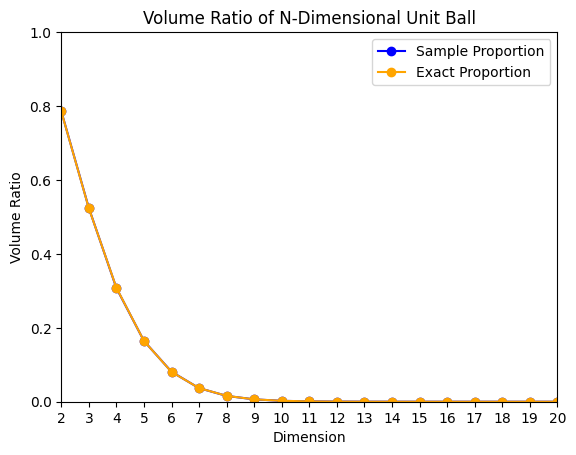

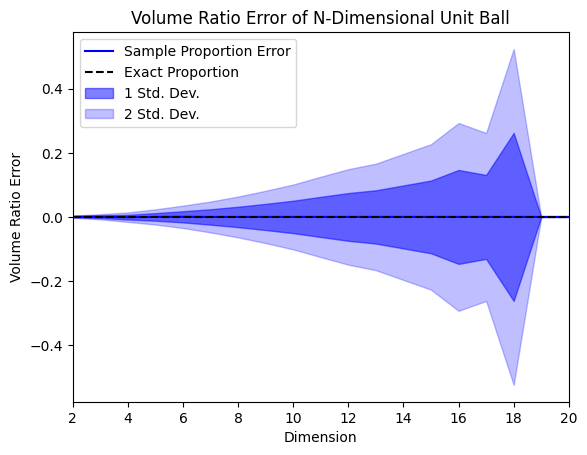

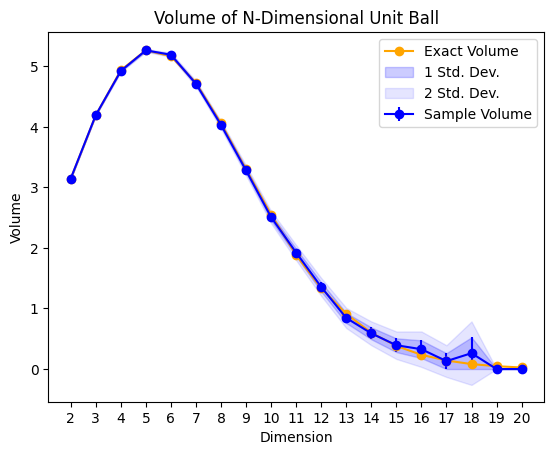

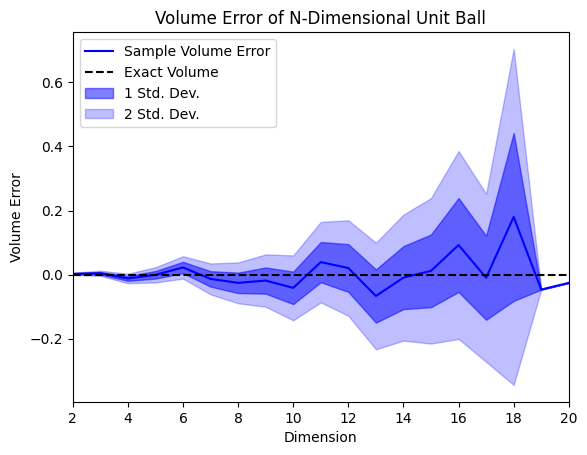

In [ ]:
# Problem 1B usage
TOP_DIM = 20  # Top dimension for the plot
DIMENSIONS = list(range(2, TOP_DIM+1))
NUM_SAMPLES = 1_000_000

# Sample unit balls in different dimensions
sample_proportion_list = np.array([sample_proportion(dim, NUM_SAMPLES) for dim in DIMENSIONS])
exact_proportion_list  = np.array([exact_proportion(dim) for dim in DIMENSIONS])

# Calculate the estimated volumes and their standard deviations
sample_volume_list = np.array([sample_volume(p, dim) for p, dim in zip(sample_proportion_list, DIMENSIONS)])
sample_volume_error_list = np.array([sample_std(p, dim, NUM_SAMPLES) for p, dim in zip(sample_proportion_list, DIMENSIONS)])
exact_volume_list = np.array([exact_volume(dim) for dim in DIMENSIONS])

# Plot the proportions
plt.plot(DIMENSIONS, sample_proportion_list, 'o-', label='Sample Proportion', color='blue')
plt.plot(DIMENSIONS, exact_proportion_list, 'o-', label='Exact Proportion', color='orange')
plt.xlabel('Dimension')
plt.ylabel('Volume Ratio')
plt.xlim(2, TOP_DIM)
plt.ylim(0, 1)
plt.xticks(DIMENSIONS)
plt.title('Volume Ratio of N-Dimensional Unit Ball')
plt.legend()
plt.show()

# Plot the proportion error
proportion_difference = sample_proportion_list - exact_proportion_list
plt.plot(DIMENSIONS, proportion_difference, label='Sample Proportion Error', color='blue')
plt.axhline(0, color='black', linestyle='--', label='Exact Proportion')
plt.fill_between(DIMENSIONS, proportion_difference - sample_volume_error_list, proportion_difference + sample_volume_error_list, color='blue', alpha=0.5, label="1 Std. Dev.")
plt.fill_between(DIMENSIONS, proportion_difference - 2 * sample_volume_error_list, proportion_difference + 2 * sample_volume_error_list, color='blue', alpha=0.25, label="2 Std. Dev.")
plt.xlabel('Dimension')
plt.ylabel('Volume Ratio Error')
plt.title('Volume Ratio Error of N-Dimensional Unit Ball')
plt.xlim(2, TOP_DIM)
plt.legend()
plt.show()

# Plot the volumes
plt.errorbar(DIMENSIONS, sample_volume_list, yerr=sample_volume_error_list, fmt='o-', label='Sample Volume', color='blue')
plt.plot(DIMENSIONS, exact_volume_list, 'o-', label='Exact Volume', color='orange')
plt.fill_between(DIMENSIONS, sample_volume_list - sample_volume_error_list, sample_volume_list + sample_volume_error_list, color='blue', alpha=0.2, label="1 Std. Dev.")
plt.fill_between(DIMENSIONS, sample_volume_list - 2 * sample_volume_error_list, sample_volume_list + 2 * sample_volume_error_list, color='blue', alpha=0.1, label="2 Std. Dev.")
plt.xlabel('Dimension')
plt.ylabel('Volume')
plt.xticks(DIMENSIONS)
plt.title('Volume of N-Dimensional Unit Ball')
plt.legend()
plt.show()

# Plot the volume error
volume_difference = sample_volume_list - exact_volume_list
plt.plot(DIMENSIONS, volume_difference, label='Sample Volume Error', color='blue')
plt.axhline(0, color='black', linestyle='--', label='Exact Volume')
plt.fill_between(DIMENSIONS, volume_difference - sample_volume_error_list, volume_difference + sample_volume_error_list, color='blue', alpha=0.5, label="1 Std. Dev.")
plt.fill_between(DIMENSIONS, volume_difference - 2 * sample_volume_error_list, volume_difference + 2 * sample_volume_error_list, color='blue', alpha=0.25, label="2 Std. Dev.")
plt.xlabel('Dimension')
plt.ylabel('Volume Error')
plt.title('Volume Error of N-Dimensional Unit Ball')
plt.xlim(2, TOP_DIM)
plt.legend()
plt.show()


Something I noticed for my code specifically is at the certain point it tends to have 0 error only because the proportions get small enough that the resolution in python fails to keep it as a real number that can be measured currectly.

Ignoring that, it's clear to see that if we keep the number of samples constant that the dimension increases error in a way that almost looks to be exponential.

I based this off of the idea that for every new dimension, you must double the points in order to get the same resolution as a system of dimension one lesser.

Therefore, I'd expect mean of the standard devation to increase exponentially in some form like $\langle\sigma\rangle\sim\dfrac{\text{\# of Samples}}{\ln(d)}$.